# Exam for Machine Learning Python Lab
<b>Consider the file income.csv, explore the data, drop the columns that you consider useless for clustering and find the optimal clustering scheme.
<b>The solution must be produced as a Python Notebook, assuming that the dataset is in the same folder as the notebook.
<b>The notebook must include appropriate comments and must operate as follows:
1. Load the data file and explore the data, showing size, and data distributions . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 2pt
2. drop the columns that are not relevant for the clustering operation, if any, and explain why you do that . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 4pt
3. find the best clustering scheme and compute: a) the quality indexes usual for clustering and b) the size of the clusters . . . . . . . . . . . . . . . . 4pt
4. apply a data transformation using the preprocessor below . . . . . . . 6pt
from sklearn.preprocessing import PowerTransformer, \
StandardScaler
from sklearn.pipeline import make_pipeline
preprocessor = make_pipeline(
StandardScaler(with_std=False),
PowerTransformer(standardize=True),
)
5. find the best clustering scheme for the transformed data, as done in step 3 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 4pt
6. show together the results of the two clustering schemes obtained and comment which of the two is better and why . . . . . . . . . . . . . . . . . . . . . 4p

### 1. Load the data file and explore the data, showing size, and data distributions . . . . . . . . . . . . . . . . 2pt

In [1]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

# Variables
file_name = 'income.csv'
separator = ','
random_state = 42

# Directives
%matplotlib inline
np.random.seed(random_state)

# Load the data into a dataframe df
df = pd.read_csv(file_name, sep = separator)

# Show its size
print(f"The dataframe contains {df.shape[0]} rows and {df.shape[1]} columns")

The dataframe contains 7891 rows and 11 columns


In [2]:
df

,Unnamed: 0,Territorio,NC_ - 0,NC_ 0- 10,NC_ 10- 15,NC_ 15- 26,NC_ 26- 55,NC_ 55- 75,NC_ 75-120,NC_120-inf,Income_tot
0,0,Abano Terme,0.0,3641.0,1997.0,4567.0,3268.0,413.0,400.0,177.0,347774542.0
1,1,Abbadia Cerreto,0.0,50.0,29.0,73.0,41.0,0.0,0.0,0.0,3399810.0
2,2,Abbadia Lariana,0.0,511.0,276.0,792.0,656.0,78.0,48.0,31.0,59153455.0
3,3,Abbadia San Salvatore,0.0,1303.0,783.0,1820.0,754.0,69.0,33.0,13.0,87615654.0
4,4,Abbasanta,0.0,577.0,194.0,443.0,430.0,26.0,13.0,0.0,30992769.0
...,...,...,...,...,...,...,...,...,...,...,...
7886,7886,Zuglio,0.0,126.0,60.0,163.0,87.0,6.0,0.0,4.0,8935126.0
7887,7887,Zumaglia,0.0,155.0,104.0,295.0,151.0,16.0,13.0,4.0,15908371.0
7888,7888,Zumpano,0.0,645.0,277.0,374.0,188.0,6.0,5.0,0.0,21065448.0
7889,7889,Zungoli,0.0,350.0,163.0,138.0,62.0,4.0,4.0,0.0,8774861.0


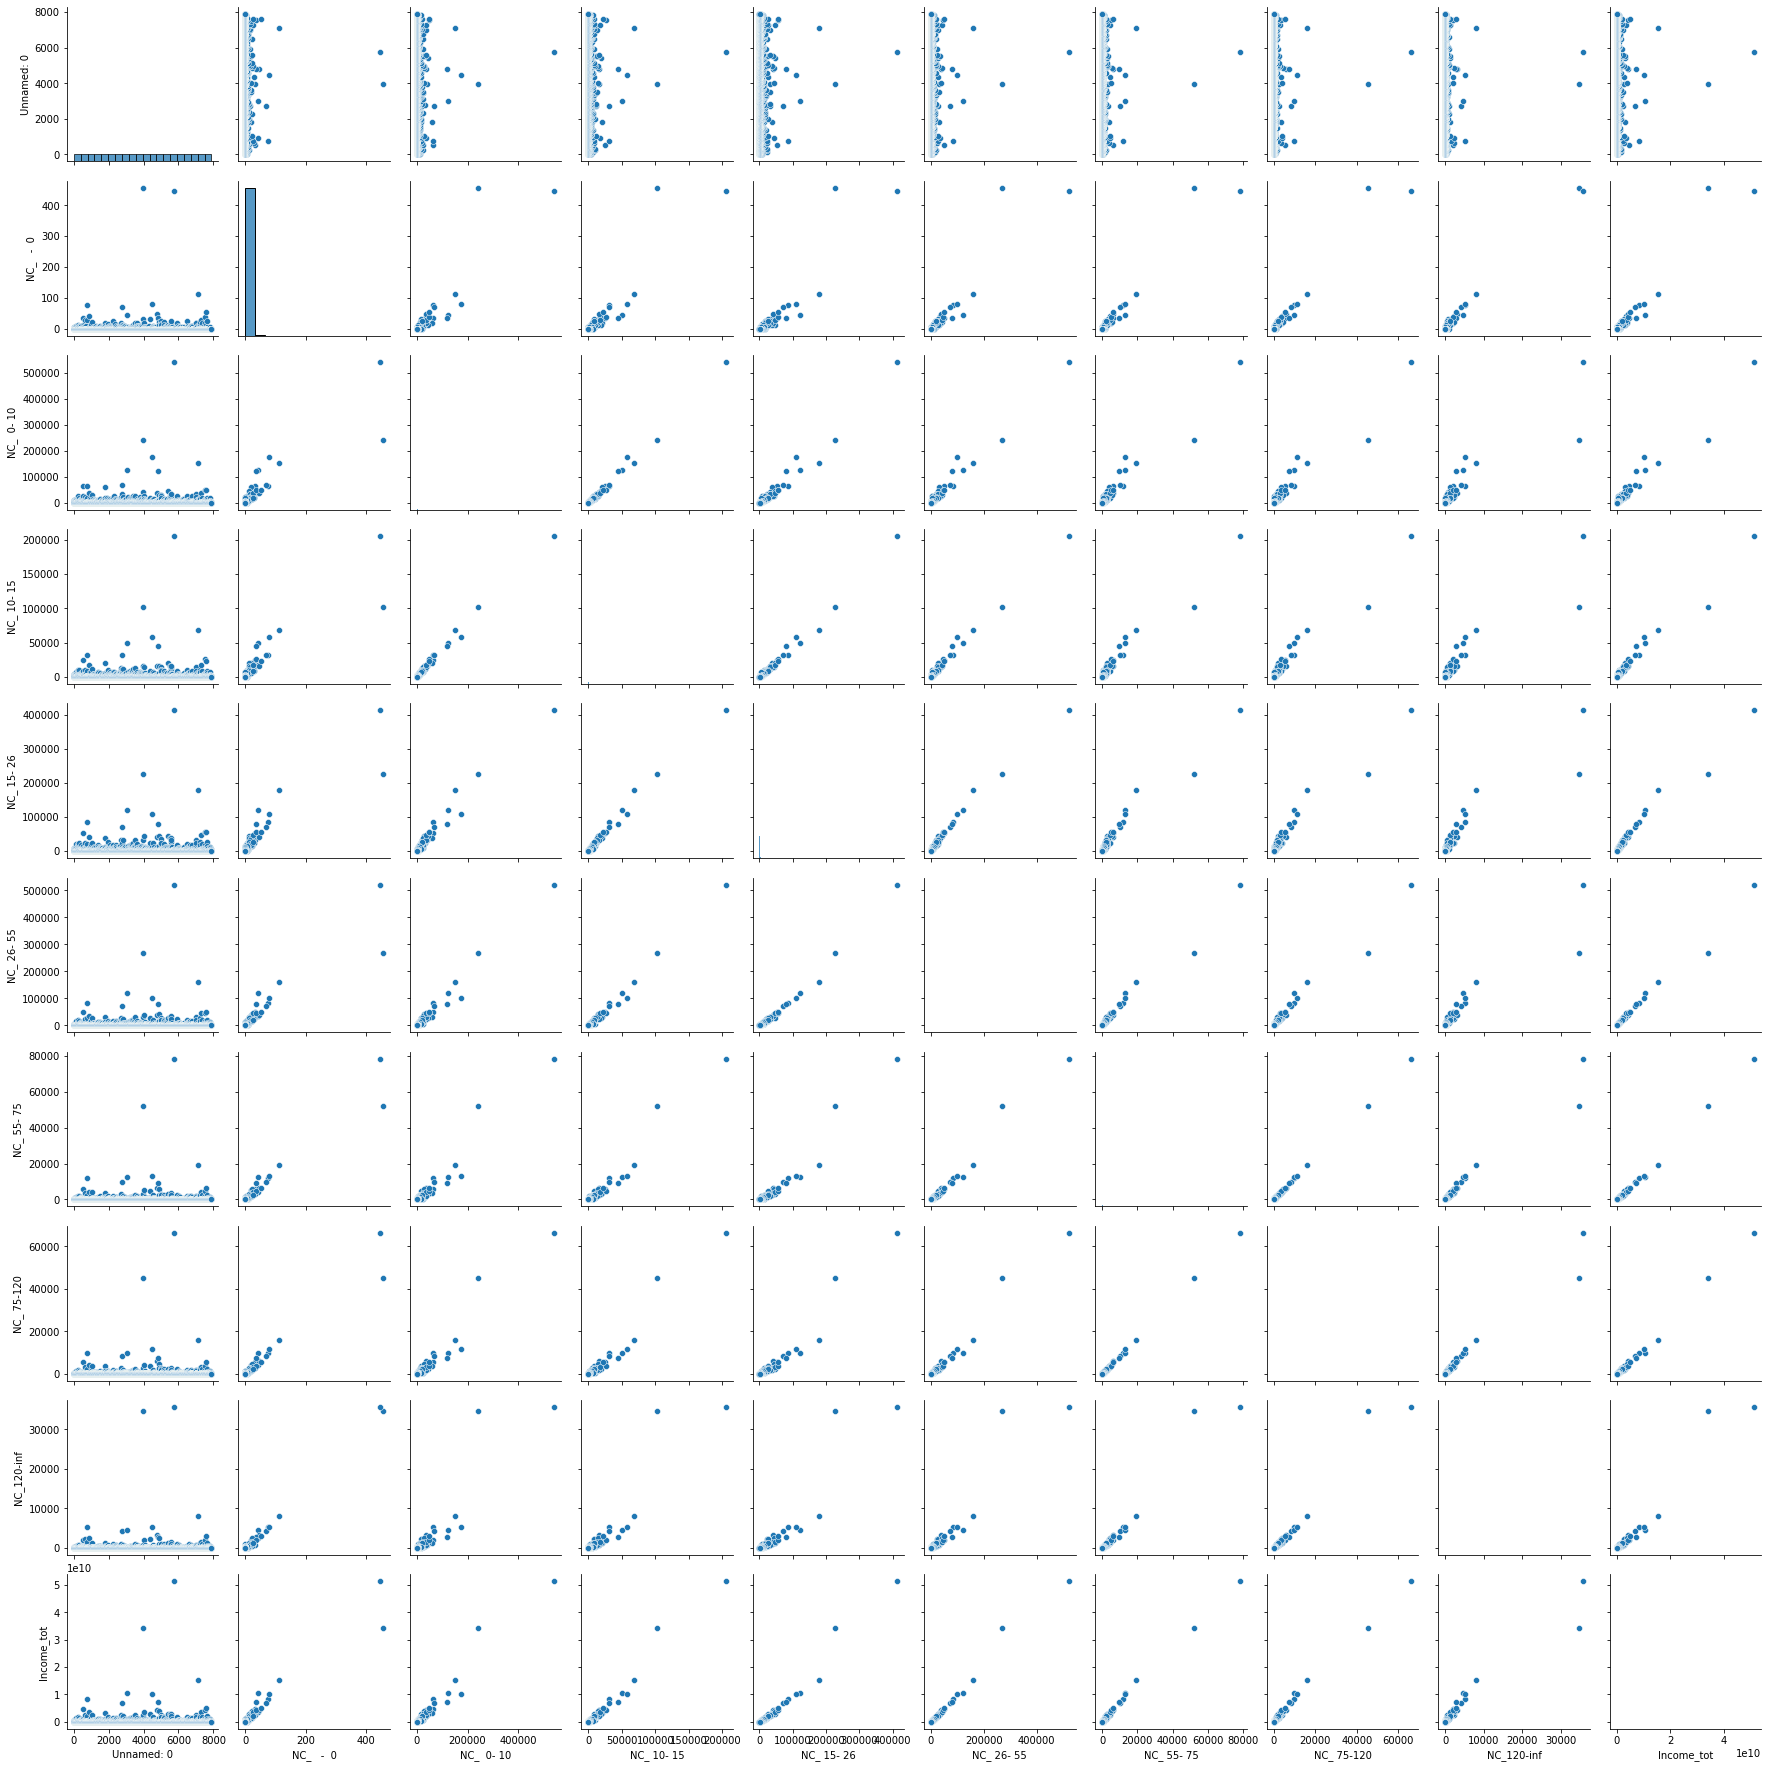

In [3]:
#--Data distribution with pairplot
sns.pairplot(df)

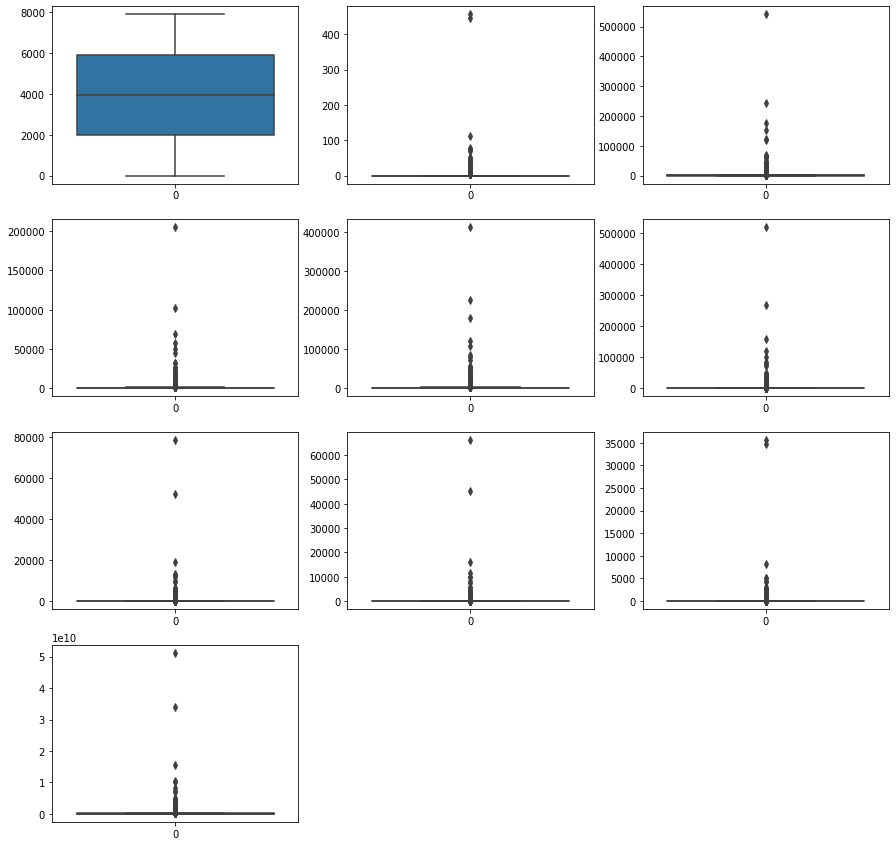

In [4]:
#--Checking Outliers
plt.figure(figsize=(15,15))
pos = 1
for i in df.columns:
        if(type(df[i][0]) != str):
                plt.subplot(4, 3, pos)
                sns.boxplot(df[i])
                pos += 1

The pairplot and boxplot don't seem to highlight any particular situation, the points seem to be grouped together quite often, usually in a oblique shape.

### 2. Drop the columns that are not relevant for the clustering operation, if any, and explain why you do that . . . . . . . . . . 4pt

C:\Users\hhitm\AppData\Local\Temp/ipykernel_18764/3268501212.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr();


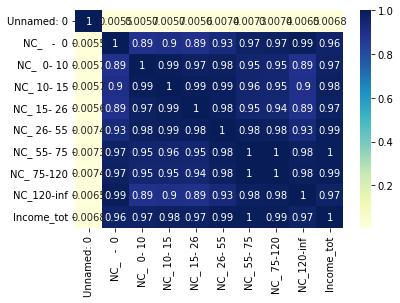

In [5]:
#Correlation matrix
correlation_matrix = df.corr();
sns.heatmap(correlation_matrix, cmap="YlGnBu", annot=True);

I'll drop the first column "Unnamed: 0", because it's an index and it has 0 correlation with the other columns.

I'll drop the column "NC_ 55- 75" because it has maximum correlation with "NC_ 75-120" and "Income_tot"

I'll drop the column "Territorio" because it's different for every row, it doesn't bring useful info.

The column "Income_tot" is not acceptable because it contains data obtained from the other columns, so it's redundant. 

In [6]:
# Drop Index column
X = df.copy() 
X = X.drop(columns = ['Unnamed: 0', 'NC_ 55- 75','Territorio', 'Income_tot'], axis = 1)
X

,NC_ - 0,NC_ 0- 10,NC_ 10- 15,NC_ 15- 26,NC_ 26- 55,NC_ 75-120,NC_120-inf
0,0.0,3641.0,1997.0,4567.0,3268.0,400.0,177.0
1,0.0,50.0,29.0,73.0,41.0,0.0,0.0
2,0.0,511.0,276.0,792.0,656.0,48.0,31.0
3,0.0,1303.0,783.0,1820.0,754.0,33.0,13.0
4,0.0,577.0,194.0,443.0,430.0,13.0,0.0
...,...,...,...,...,...,...,...
7886,0.0,126.0,60.0,163.0,87.0,0.0,4.0
7887,0.0,155.0,104.0,295.0,151.0,13.0,4.0
7888,0.0,645.0,277.0,374.0,188.0,5.0,0.0
7889,0.0,350.0,163.0,138.0,62.0,4.0,0.0


In [7]:
#marco giovanni
# conta il numero di valori possibili per una colonna col nome strano
column_names = list(X.columns)
a = np.unique(X[column_names[0]], return_counts = True)
b = pd.DataFrame(a)
b

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
0,0.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,...,41.0,43.0,47.0,54.0,70.0,75.0,79.0,113.0,445.0,456.0
1,7631.0,82.0,43.0,29.0,16.0,13.0,11.0,8.0,5.0,5.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


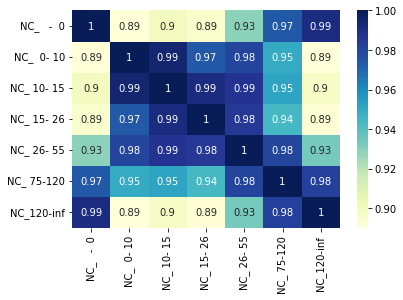

In [8]:
#Correlation matrix
correlation_matrix = X.corr();
sns.heatmap(correlation_matrix, cmap="YlGnBu", annot=True);

### 3. find the best clustering scheme and compute: a) the quality indexes usual for clustering and b) the size of the clusters

### con Dbscan

In [9]:
#X = X.to_numpy()
X

,NC_ - 0,NC_ 0- 10,NC_ 10- 15,NC_ 15- 26,NC_ 26- 55,NC_ 75-120,NC_120-inf
0,0.0,3641.0,1997.0,4567.0,3268.0,400.0,177.0
1,0.0,50.0,29.0,73.0,41.0,0.0,0.0
2,0.0,511.0,276.0,792.0,656.0,48.0,31.0
3,0.0,1303.0,783.0,1820.0,754.0,33.0,13.0
4,0.0,577.0,194.0,443.0,430.0,13.0,0.0
...,...,...,...,...,...,...,...
7886,0.0,126.0,60.0,163.0,87.0,0.0,4.0
7887,0.0,155.0,104.0,295.0,151.0,13.0,4.0
7888,0.0,645.0,277.0,374.0,188.0,5.0,0.0
7889,0.0,350.0,163.0,138.0,62.0,4.0,0.0


In [27]:
#Prova con DBscan, parametri più elevati, deviation non lo prende e non funziona
from sklearn.cluster import DBSCAN
from sklearn.model_selection import ParameterGrid

param_grid = {'eps': list(np.arange(60, 120, 20)), 'min_samples': list(range(5,30,5))}
params = list(ParameterGrid(param_grid))

dbscan_out = pd.DataFrame(columns = ['eps','min_samples','n_clusters','silhouette', 'unclust%'])        #0 righe, 5 colonne

for i in params:
    db = DBSCAN(eps = i['eps'], min_samples = i['min_samples'])
    y_db = db.fit_predict(X.to_numpy())
    cluster_labels_all = np.unique(y_db)
    cluster_labels = cluster_labels_all[cluster_labels_all != -1]
    n_clusters = len(cluster_labels)
    if n_clusters >1 :
        X_cl = X.to_numpy()[y_db!=-1, :]                                                #filtra il rumore da X
        y_db_cl = y_db[y_db!=-1]                                            #filtra il rumore da Y

        silhouette = silhouette_score(X_cl,y_db_cl)

        #silhouette = silhouette_score(X.to_numpy()[y_db != -1],y_db[y_db != -1])
        #deviation = np.sqrt(np.unique(y_db_cl, return_counts = True)[1].var())/i
        uncl_p = (1 - y_db_cl.shape[0]/y_db.shape[0]) * 100                 #% di dati unclustered
        dbscan_out.loc[len(dbscan_out)] = [db.eps, db.min_samples, n_clusters, silhouette, uncl_p]          #riempie dataframe per visualizzare l'output
        print ("Param EPS = "+ str(i['eps'])+ " param MIN_sample ="+str(i['min_samples']))
        print ("The silhouette score is {:.2f}".format(silhouette))
        print("----------------------")

Param EPS = 60 param MIN_sample =5
The silhouette score is 0.23
----------------------
Param EPS = 60 param MIN_sample =15
The silhouette score is 0.41
----------------------
Param EPS = 60 param MIN_sample =20
The silhouette score is 0.28
----------------------
Param EPS = 60 param MIN_sample =25
The silhouette score is 0.49
----------------------
Param EPS = 80 param MIN_sample =5
The silhouette score is 0.17
----------------------
Param EPS = 80 param MIN_sample =10
The silhouette score is 0.59
----------------------
Param EPS = 80 param MIN_sample =15
The silhouette score is 0.35
----------------------
Param EPS = 100 param MIN_sample =5
The silhouette score is 0.03
----------------------
Param EPS = 100 param MIN_sample =10
The silhouette score is 0.56
----------------------
Param EPS = 100 param MIN_sample =15
The silhouette score is 0.54
----------------------
Param EPS = 100 param MIN_sample =25
The silhouette score is 0.56
----------------------


In [28]:
sil_thr = 0.45  # visualize results only for combinations with silhouette above the threshold
unc_thr = 40 # visualize results only for combinations with unclustered% below the threshold
n_clu_max_thr = 100

                                                                        #Filtro
dbscan_out[(dbscan_out['silhouette']>=sil_thr)\
         & (dbscan_out['unclust%']<=unc_thr)\
         & (dbscan_out['n_clusters']<=n_clu_max_thr)          ]

,eps,min_samples,n_clusters,silhouette,unclust%
5,80.0,10.0,2.0,0.594232,38.550247
8,100.0,10.0,7.0,0.556755,31.909771
9,100.0,15.0,4.0,0.535051,34.976556
10,100.0,25.0,2.0,0.559190,39.842859


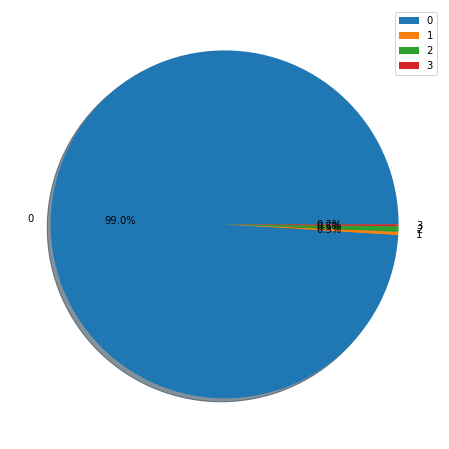

In [29]:
db = DBSCAN(eps = 100.00, min_samples = 15)

# Fit and predict
y_db = db.fit_predict(X.to_numpy())
y_db_cl = y_db[y_db!=-1]                                            #filtra il rumore da Y

clust_sizes_km = np.unique(y_db_cl, return_counts=True)

fig = plt.figure(figsize=(16,8))
data = clust_sizes_km[1]
labels = clust_sizes_km[0]
plt.pie(data, 
    labels = labels, 
    autopct='%1.1f%%', 
    shadow=True)
plt.legend()
plt.show()

### Identico ma con Kmeans

In [13]:
# Range of possible clusters
k_range = range(2,11)

# Distortion, Silhouette Score and size deviation as measures
distortions = []
silhouette_scores = []
size_deviation = []

for i in k_range:
    
    # Iterate over our range of possible clusters
    km = KMeans(n_clusters = i, 
                init = 'k-means++', 
                n_init = 10, 
                max_iter = 300, 
                random_state = random_state)

    # Fit predict
    y_km = km.fit_predict(X)

    # Compute the deviation with the provided formula
    deviation = np.sqrt(np.unique(y_km, return_counts = True)[1].var())/i

    # Store the data in the arrays
    distortions.append(km.inertia_)
    silhouette_scores.append(silhouette_score(X,y_km))
    size_deviation.append(deviation)

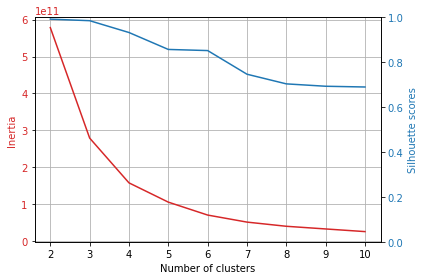

In [14]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Number of clusters')
ax1.set_ylabel('Inertia', color=color)
plt.grid()
ax1.plot(k_range, distortions, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Silhouette scores', color=color)  # we already handled the x-label with ax1
ax2.plot(k_range, silhouette_scores, color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim(0,1) # the axis for silhouette is [0,1]

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [15]:
k=4
km = KMeans(n_clusters=k, 
            random_state=random_state)
y_km = km.fit_predict(X)
print("Number of clusters = {}\t- Distortion = {:6.2f}\t- Silhouette score = {:4.2f}"\
    .format(k,distortions[k_range.index(k)],silhouette_scores[k_range.index(k)]))

Number of clusters = 4	- Distortion = 157834832120.18	- Silhouette score = 0.93


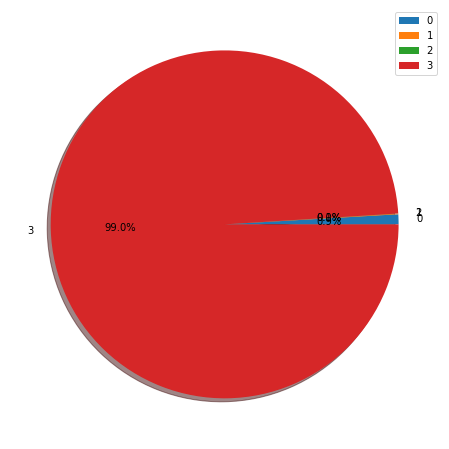

In [16]:
clust_sizes_km = np.unique(y_km,return_counts=True)

fig = plt.figure(figsize=(16,8))
data = clust_sizes_km[1]
labels = clust_sizes_km[0]
plt.pie(data, 
    labels = labels, 
    autopct='%1.1f%%', 
    shadow=True)
plt.legend()
plt.show()

### 4. apply a data transformation using the preprocessor below . . . . . . . 6pt
from sklearn.preprocessing import PowerTransformer, \
StandardScaler
from sklearn.pipeline import make_pipeline
preprocessor = make_pipeline(
StandardScaler(with_std=False),
PowerTransformer(standardize=True),
)

In [17]:
from sklearn.preprocessing import PowerTransformer, StandardScaler
from sklearn.pipeline import make_pipeline

preprocessor = make_pipeline(StandardScaler(with_std=False),
                        PowerTransformer(standardize=True))
X_fit= X.copy()
X_fit= preprocessor.fit_transform(X_fit)
X_fit

array([[-0.18458481,  1.42250056,  1.45416407, ...,  1.52629428,
         1.90401051,  1.953686  ],
       [-0.18458481, -1.19815717, -1.20342171, ..., -1.03548671,
        -0.96755778, -0.85185343],
       [-0.18458481, -0.3045096 , -0.16628161, ...,  0.44620933,
         0.75114637,  1.32039822],
       ...,
       [-0.18458481, -0.05978469, -0.16232812, ..., -0.65745361,
        -0.76467496, -0.85185343],
       [-0.18458481, -0.60812915, -0.62665358, ..., -0.9807136 ,
        -0.80486122, -0.85185343],
       [-0.18458481, -0.06158195, -0.48954108, ..., -0.92360001,
        -0.96755778, -0.85185343]])

### 5. find the best clustering scheme for the transformed data, as done in step 3 . . . . . . . . . . . . . . . . . 4pt

In [18]:
from sklearn.cluster import DBSCAN
from sklearn.model_selection import ParameterGrid

param_grid = {'eps': list(np.arange(1, 4, 1)), 'min_samples': list(range(2,18,8))}
params = list(ParameterGrid(param_grid))

dbscan_out2 = pd.DataFrame(columns = ['eps','min_samples','n_clusters','silhouette', 'unclust%'])        #0 righe, 5 colonne

for i in params:
    db2 = DBSCAN(eps = i['eps'], min_samples = i['min_samples'])
    y_db2 = db2.fit_predict(X_fit)
    cluster_labels_all = np.unique(y_db2)
    cluster_labels = cluster_labels_all[cluster_labels_all != -1]
    n_clusters = len(cluster_labels)
    if n_clusters >1 :
        X_cl = X_fit[y_db2!=-1, :]                                                #filtra il rumore da X
        y_db_cl = y_db2[y_db2!=-1]                                            #filtra il rumore da Y

        silhouette = silhouette_score(X_cl,y_db_cl)

        #silhouette = silhouette_score(X.to_numpy()[y_db != -1],y_db[y_db != -1])
        #deviation = np.sqrt(np.unique(y_db_cl, return_counts = True)[1].var())/i
        uncl_p = (1 - y_db_cl.shape[0]/y_db2.shape[0]) * 100                 #% di dati unclustered
        dbscan_out2.loc[len(dbscan_out2)] = [db2.eps, db2.min_samples, n_clusters, silhouette, uncl_p]          #riempie dataframe per visualizzare l'output
        print ("Param EPS = "+ str(i['eps'])+ " param MIN_sample ="+str(i['min_samples']))
        print ("The silhouette score is {:.2f}".format(silhouette))
        print("----------------------")

Param EPS = 1 param MIN_sample =2
The silhouette score is 0.58
----------------------
Param EPS = 1 param MIN_sample =10
The silhouette score is 0.64
----------------------
Param EPS = 2 param MIN_sample =2
The silhouette score is 0.64
----------------------
Param EPS = 2 param MIN_sample =10
The silhouette score is 0.64
----------------------
Param EPS = 3 param MIN_sample =2
The silhouette score is 0.65
----------------------
Param EPS = 3 param MIN_sample =10
The silhouette score is 0.65
----------------------


In [19]:
sil_thr = 0.55  # visualize results only for combinations with silhouette above the threshold
unc_thr = 10 # visualize results only for combinations with unclustered% below the threshold
n_clu_max_thr = 100

                                                                        #Filtro
dbscan_out2[(dbscan_out2['silhouette']>=sil_thr)\
         & (dbscan_out2['unclust%']<=unc_thr)\
         & (dbscan_out2['n_clusters']<=n_clu_max_thr)          ]

,eps,min_samples,n_clusters,silhouette,unclust%
0,1.0,2.0,5.0,0.581977,0.139399
1,1.0,10.0,2.0,0.643984,0.253453
2,2.0,2.0,3.0,0.644509,0.050691
3,2.0,10.0,2.0,0.644834,0.114054
4,3.0,2.0,2.0,0.648445,0.038018
5,3.0,10.0,2.0,0.646006,0.063363


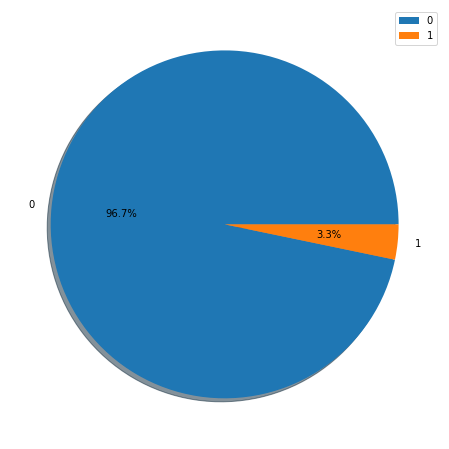

In [20]:
db2 = DBSCAN(eps = 3.00, min_samples = 2)

# Fit and predict
y_db2 = db2.fit_predict(X_fit)
y_db2_cl = y_db2[y_db2!=-1]                                            #filtra il rumore da Y

clust_sizes_km = np.unique(y_db2_cl, return_counts=True)

fig = plt.figure(figsize=(16,8))
data = clust_sizes_km[1]
labels = clust_sizes_km[0]
plt.pie(data, 
    labels = labels, 
    autopct='%1.1f%%', 
    shadow=True)
plt.legend()
plt.show()

In [21]:
# Range of possible clusters
k_range = range(2,11)

# Distortion, Silhouette Score and size deviation as measures
distortions2 = []
silhouette_scores2 = []
size_deviation2 = []

for i in k_range:
    
    # Iterate over our range of possible clusters
    km2 = KMeans(n_clusters = i, 
                init = 'k-means++', 
                n_init = 10, 
                max_iter = 300, 
                random_state = random_state)

    # Fit predict
    y_km2 = km2.fit_predict(X_fit)

    # Compute the deviation with the provided formula
    deviation = np.sqrt(np.unique(y_km2, return_counts = True)[1].var())/i

    # Store the data in the arrays
    distortions2.append(km2.inertia_)
    silhouette_scores2.append(silhouette_score(X_fit,y_km2))
    size_deviation2.append(deviation)

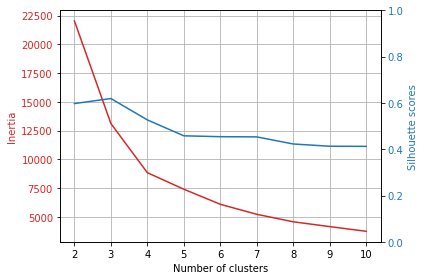

In [22]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Number of clusters')
ax1.set_ylabel('Inertia', color=color)
plt.grid()
ax1.plot(k_range, distortions2, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Silhouette scores', color=color)  # we already handled the x-label with ax1
ax2.plot(k_range, silhouette_scores2, color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim(0,1) # the axis for silhouette is [0,1]

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [23]:
k=3
km2 = KMeans(n_clusters=k, 
            random_state=random_state)
y_km2 = km2.fit_predict(X_fit)
print("Number of clusters = {}\t- Distortion = {:6.2f}\t- Silhouette score = {:4.2f}"\
    .format(k,distortions2[k_range.index(k)],silhouette_scores2[k_range.index(k)]))

Number of clusters = 3	- Distortion = 13110.07	- Silhouette score = 0.62


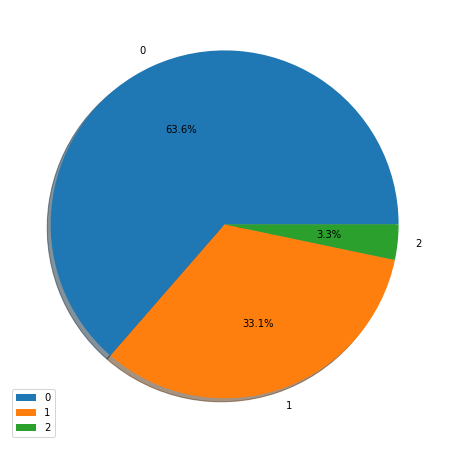

In [24]:
clust_sizes_km = np.unique(y_km2,return_counts=True)

fig = plt.figure(figsize=(16,8))
data = clust_sizes_km[1]
labels = clust_sizes_km[0]
plt.pie(data, 
    labels = labels, 
    autopct='%1.1f%%', 
    shadow=True)
plt.legend()
plt.show()

### 6. show together the results of the two clustering schemes obtained and comment which of the two is better and why . . . . . . . . . . . . . . . . . . . . . 4pt

### con Kmeans

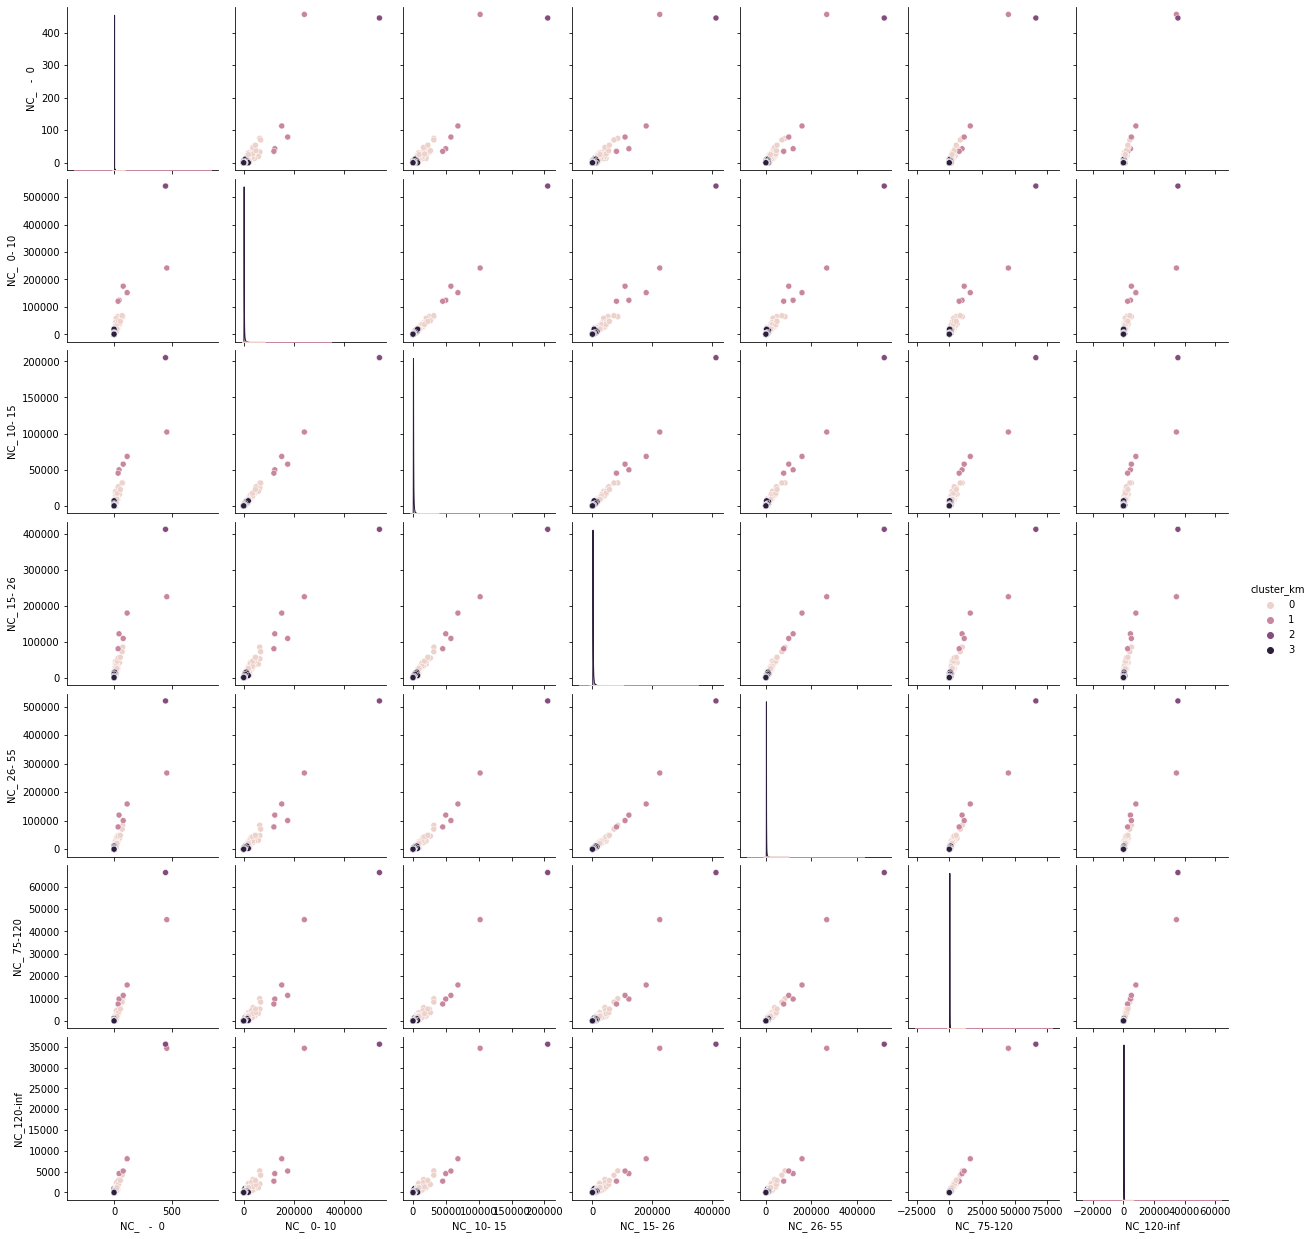

In [25]:
Xfirst = X.copy()
Xfirst['cluster_km']=y_km
sns.pairplot(data=Xfirst, hue='cluster_km');
plt.show()

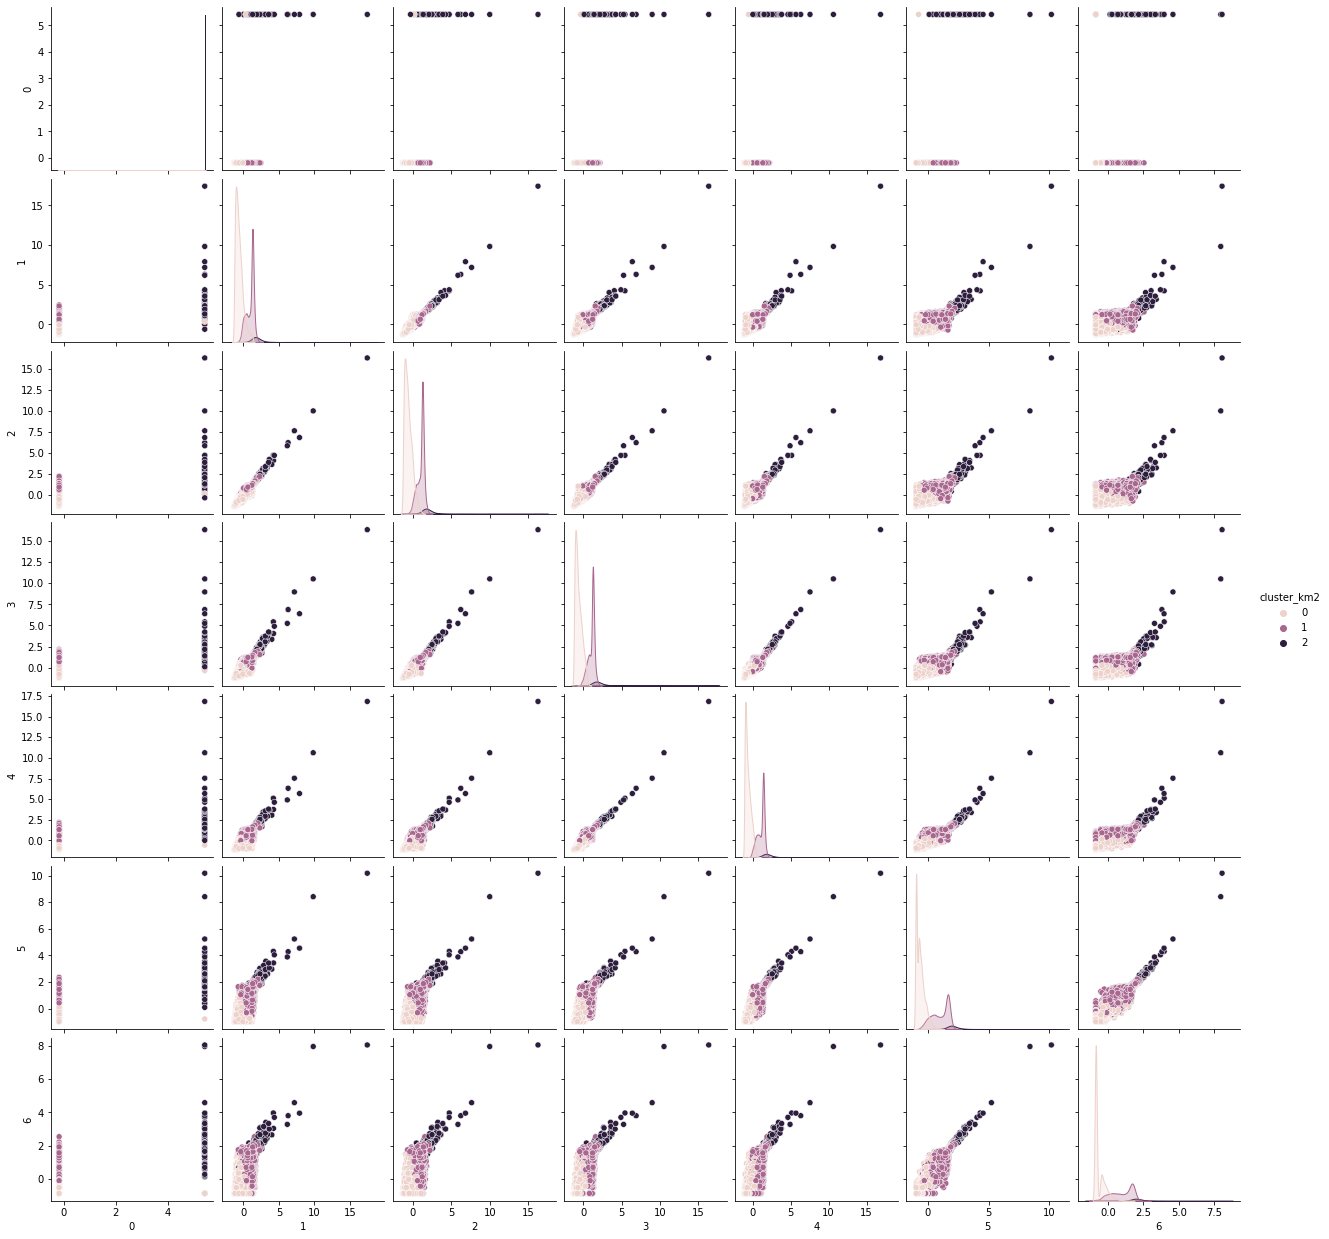

In [26]:
Xsecond = pd.DataFrame(X_fit)
Xsecond['cluster_km2']=y_km2
sns.pairplot(data=Xsecond, hue='cluster_km2');
plt.show()

The second is better thanks to the lower distortion.